# Reading Annotaions

In [27]:
import re
from datetime import datetime

# Define the file path
file_path = '/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/SET2/annotations/annotations.txt'

# Function to safely parse coordinate data
def parse_coordinates(coord_string):
    try:
        coordinates = eval(coord_string)
        if isinstance(coordinates, list) and all(isinstance(coord, tuple) for coord in coordinates):
            return coordinates
    except:
        return []

# Function to parse a line
def parse_line(line):
    # Use regex to split line while ignoring commas within square brackets
    parts = re.split(r',(?![^\[\]]*\])', line.strip())

    if len(parts) < 6:
        return None, 'Insufficient data'

    try:
        active = int(parts[0])
        index = int(parts[1])
        data_type = int(parts[2])
        coordinates = parse_coordinates(parts[3])
        colour = parts[4]
        fixed_value = int(parts[5])
    except ValueError as e:
        return None, str(e)

    return {
        'Active': active,
        'Index': index,
        'Type': data_type,
        'Coordinates': coordinates,
        'Color': colour,
        'Fixed Value': fixed_value
    }, None

# Main function to read and categorize data
def read_and_categorize(file_path):
    categorized_data = []
    error_count = 0

    try:
        with open(file_path, 'r') as file:
            for line in file:
                parsed_data, error = parse_line(line)
                if parsed_data:
                    categorized_data.append(parsed_data)
#                     print("Data parsed successfully:", parsed_data)
                elif error:
                    print(f"Skipping line due to parsing error: {line}. Error: {error}")
                    error_count += 1
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")

    return categorized_data, error_count

# Read and print the categorized data
categorized_data, error_count = read_and_categorize(file_path)

if not categorized_data and error_count == 0:
    print("No data was parsed successfully.")
else:
    print(f"Total number of parsing errors: {error_count}")


Skipping line due to parsing error: 1,17,6,[(0.6341298530744202,0.9107860149071415),                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
. Error: invalid literal for int() with base 10: ''
Skipping line due to parsing error: 1,1988,6,[(0.6342029618406476,0.9109958133994494),
. Error: invalid literal for int() with base 10: ''
Skipping line due to parsing error: (0.6503451583942874,0.8844702322448736)],#00ffff,1,20/11/2023/14:44:48                      

In [30]:
cd = 0
panck = 0
others = 0
for i in range(len(categorized_data)):
    if categorized_data[i]['Color'] == "#00ffff" or categorized_data[i]['Color'] == "#0000ff":
        cd += 1
    elif categorized_data[i]['Color'] == '#ff00ff':
        panck += 1
    else:
        others += 1

In [31]:
print('cd45: ' + str(cd))
print('panck: ' + str(panck))
print('others: ' + str(others))

cd45: 2128
panck: 5059
others: 1347


In [8]:
points_normalized = []
points_colors = []
for i in range(len(categorized_data)):
    points_normalized.append(categorized_data[i]['Coordinates'][0])
    points_colors.append(categorized_data[i]['Color'])  # Extracting color

    
max(points_normalized, key=lambda x:x[0])


(0.7315173798122041, 0.8382083871183299)

In [42]:
points_colors

['#0000ff',
 '#0000ff',
 '#0000ff',
 '#0000ff',
 '#0000ff',
 '#0000ff',
 '#0000ff',
 '#0000ff',
 '#0000ff',
 '#0000ff',
 '#0000ff',
 '#0000ff',
 '#0000ff',
 '#0000ff',
 '#0000ff',
 '#0000ff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#00ffff',
 '#0

all points: 8534
 points shown: 8534


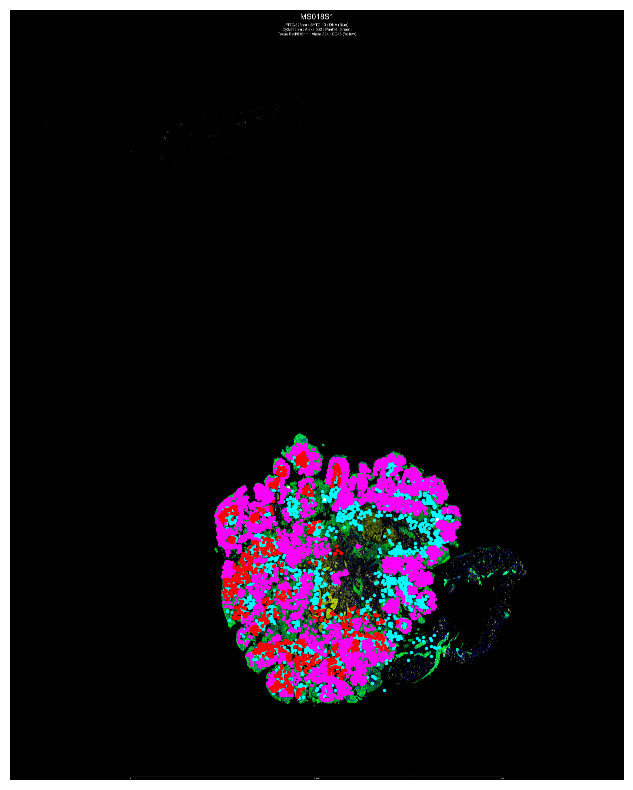

In [10]:
import cv2
import matplotlib.pyplot as plt

# Path to your image
image_path = "/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/SET2/MS018S1.png"

# Load the image using OpenCV
image = cv2.imread(image_path)

# Get the width and height of the image
height, width, _ = image.shape

# Lists to hold normalized points (x, y) and their respective colors
points_normalized = []
points_colors = []

# Extract coordinates and colors from categorized_data
for i in range(len(categorized_data)):
    points_normalized.append(categorized_data[i]['Coordinates'][0])
    points_colors.append(categorized_data[i]['Color'])  # Extracting color

# Convert normalized coordinates to pixel values
points_pixel = [(int(x * width), int(y * width)) for x, y in points_normalized]

plt.figure(figsize=(10, 10))

# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

print(f'all points: {len(points_pixel)}')
points_shown = 0

# Plot the points on the image with their respective colors
for (x, y), color in zip(points_pixel, points_colors):
    plt.scatter(x, y, c=color, marker='o', s=2)  # Using extracted color for each point
    points_shown += 1

print(f' points shown: {points_shown}')

plt.axis("off")
plt.savefig("/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/SET2/annotations/MS018S1.png")    
# Show the image with points
plt.show()


# Modify ROI to be 640*640

Patch at (10564, 20859): Size = (640, 640)
Patch at (10564, 21499): Size = (640, 640)
Patch at (10564, 22139): Size = (640, 640)
Patch at (11204, 20859): Size = (640, 640)
Patch at (11204, 21499): Size = (640, 640)
Patch at (11204, 22139): Size = (640, 640)
Patch at (8239, 19879): Size = (640, 640)
Patch at (8239, 20519): Size = (640, 640)
Patch at (8239, 21159): Size = (640, 640)
Patch at (8879, 19879): Size = (640, 640)
Patch at (8879, 20519): Size = (640, 640)
Patch at (8879, 21159): Size = (640, 640)
Patch at (10902, 18059): Size = (640, 640)
Patch at (10902, 18699): Size = (640, 640)
Patch at (10902, 19339): Size = (640, 640)
Patch at (11542, 18059): Size = (640, 640)
Patch at (11542, 18699): Size = (640, 640)
Patch at (11542, 19339): Size = (640, 640)
Patch at (7490, 16542): Size = (640, 640)
Patch at (7490, 17182): Size = (640, 640)
Patch at (7490, 17822): Size = (640, 640)
Patch at (8130, 16542): Size = (640, 640)
Patch at (8130, 17182): Size = (640, 640)
Patch at (8130, 17822)

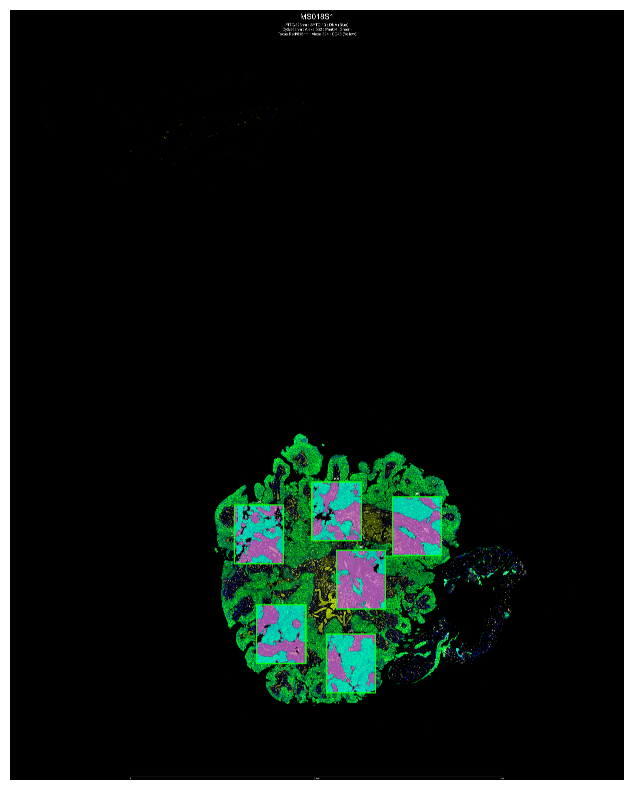

[(10564, 20859, 11204, 21499), (10564, 21499, 11204, 22139), (10564, 22139, 11204, 22779), (11204, 20859, 11844, 21499), (11204, 21499, 11844, 22139), (11204, 22139, 11844, 22779), (8239, 19879, 8879, 20519), (8239, 20519, 8879, 21159), (8239, 21159, 8879, 21799), (8879, 19879, 9519, 20519), (8879, 20519, 9519, 21159), (8879, 21159, 9519, 21799), (10902, 18059, 11542, 18699), (10902, 18699, 11542, 19339), (10902, 19339, 11542, 19979), (11542, 18059, 12182, 18699), (11542, 18699, 12182, 19339), (11542, 19339, 12182, 19979), (7490, 16542, 8130, 17182), (7490, 17182, 8130, 17822), (7490, 17822, 8130, 18462), (8130, 16542, 8770, 17182), (8130, 17182, 8770, 17822), (8130, 17822, 8770, 18462), (12776, 16273, 13416, 16913), (12776, 16913, 13416, 17553), (12776, 17553, 13416, 18193), (13416, 16273, 14056, 16913), (13416, 16913, 14056, 17553), (13416, 17553, 14056, 18193), (10088, 15773, 10728, 16413), (10088, 16413, 10728, 17053), (10088, 17053, 10728, 17693), (10728, 15773, 11368, 16413), (10

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

image_number = 18
SET = 2
image_name = f'MS0{image_number}S1'

def detect_rois_and_create_patches(first_image_path, second_image_path, output_folder, patch_size=(640, 640),
                                    min_width=300, min_height=300, lower_white=np.array([100,100,100]),
                                    upper_white=np.array([255,255,255])):
    # Read the first image
    image = cv2.imread(first_image_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Create a mask for white color
    mask = cv2.inRange(image, lower_white, upper_white)

    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Load the second image for cropping
    crop_image = cv2.imread(second_image_path)

    # Initialize lists to store width and height of each ROI
    widths = []
    heights = []

    # First iteration to find minimum width and height
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w >= min_width and h >= min_height:
            widths.append(w)
            heights.append(h)

    # Determine common width and height for all ROIs
    common_width = min(widths)
    common_height = min(heights)

    roi_boxes = []
    for i, contour in enumerate(contours):
        x, y, w, h = cv2.boundingRect(contour)

        # Check for minimum size
        if w >= min_width and h >= min_height:
            epsilon = 0.05 * cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, epsilon, True)

            # Adjust x, y, width, and height to get the common size ROI
            new_x = max(x + (w - common_width) // 2, 0)
            new_y = max(y + (h - common_height) // 2, 0)

            # Create patches within the ROI
            num_patches_x = (common_width // patch_size[0])
            num_patches_y = (common_height // patch_size[1])

            for patch_x in range(num_patches_x):
                for patch_y in range(num_patches_y):
                    patch_start_x = new_x + patch_x * patch_size[0]
                    patch_start_y = new_y + patch_y * patch_size[1]
                    patch_end_x = patch_start_x + patch_size[0]
                    patch_end_y = patch_start_y + patch_size[1]
                    
                    # Ensure the patch stays within the ROI boundaries
                    if patch_end_x <= (new_x + common_width) and patch_end_y <= (new_y + common_height):
                        roi_boxes.append((patch_start_x, patch_start_y, patch_end_x, patch_end_y))

                        # Crop the patch from the second image using the adjusted coordinates
                        patch = crop_image[patch_start_y:patch_end_y, patch_start_x:patch_end_x]
                        cv2.imwrite(os.path.join(output_folder, f"{image_number}_roi_{i}_patch_{patch_x}_{patch_y}.jpg"), patch)
                        print(f"Patch at ({patch_start_x}, {patch_start_y}): Size = {patch_size}")

            # Draw a bounding box around the detected ROI on the first image
            cv2.rectangle(image, (new_x, new_y), (new_x + common_width, new_y + common_height), (0, 255, 0), 40)

    # Convert BGR to RGB for Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the result using Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis("off")
    plt.show()

    return roi_boxes

# Example usage
first_image_path = f"/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/SET{SET}/{image_name}_MU.png"
second_image_path = f"/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/SET{SET}/{image_name}.png"
output_folder = "/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

rois = detect_rois_and_create_patches(first_image_path, second_image_path, output_folder)
print(rois)


# Creating Patches of 640 * 640

Patch at (10564, 20859): Size = (640, 640)
Patch at (10564, 21499): Size = (640, 640)
Patch at (10564, 22139): Size = (640, 640)
Patch at (10564, 22183): Size = (640, 640)
Patch at (11204, 20859): Size = (640, 640)
Patch at (11204, 21499): Size = (640, 640)
Patch at (11204, 22139): Size = (640, 640)
Patch at (11204, 22183): Size = (640, 640)
Patch at (11573, 20859): Size = (640, 640)
Patch at (11573, 21499): Size = (640, 640)
Patch at (11573, 22139): Size = (640, 640)
Patch at (11573, 22183): Size = (640, 640)
Patch at (8239, 19879): Size = (640, 640)
Patch at (8239, 20519): Size = (640, 640)
Patch at (8239, 21159): Size = (640, 640)
Patch at (8239, 21203): Size = (640, 640)
Patch at (8879, 19879): Size = (640, 640)
Patch at (8879, 20519): Size = (640, 640)
Patch at (8879, 21159): Size = (640, 640)
Patch at (8879, 21203): Size = (640, 640)
Patch at (9248, 19879): Size = (640, 640)
Patch at (9248, 20519): Size = (640, 640)
Patch at (9248, 21159): Size = (640, 640)
Patch at (9248, 21203)

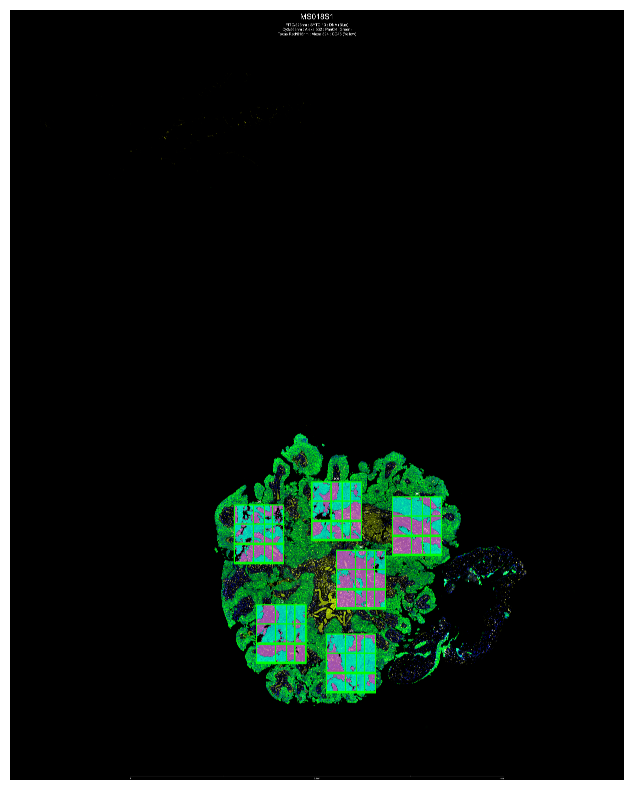

[(10564, 20859, 11204, 21499), (10564, 21499, 11204, 22139), (10564, 22139, 11204, 22779), (10564, 22183, 11204, 22823), (11204, 20859, 11844, 21499), (11204, 21499, 11844, 22139), (11204, 22139, 11844, 22779), (11204, 22183, 11844, 22823), (11573, 20859, 12213, 21499), (11573, 21499, 12213, 22139), (11573, 22139, 12213, 22779), (11573, 22183, 12213, 22823), (8239, 19879, 8879, 20519), (8239, 20519, 8879, 21159), (8239, 21159, 8879, 21799), (8239, 21203, 8879, 21843), (8879, 19879, 9519, 20519), (8879, 20519, 9519, 21159), (8879, 21159, 9519, 21799), (8879, 21203, 9519, 21843), (9248, 19879, 9888, 20519), (9248, 20519, 9888, 21159), (9248, 21159, 9888, 21799), (9248, 21203, 9888, 21843), (10902, 18059, 11542, 18699), (10902, 18699, 11542, 19339), (10902, 19339, 11542, 19979), (10902, 19383, 11542, 20023), (11542, 18059, 12182, 18699), (11542, 18699, 12182, 19339), (11542, 19339, 12182, 19979), (11542, 19383, 12182, 20023), (11911, 18059, 12551, 18699), (11911, 18699, 12551, 19339), (11

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def detect_rois_and_create_patches(first_image_path, second_image_path, output_folder, patch_size=(640, 640),
                                   min_width=300, min_height=300, lower_white=np.array([100,100,100]),
                                   upper_white=np.array([255,255,255])):
    # Read the first image
    image = cv2.imread(first_image_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Create a mask for white color
    mask = cv2.inRange(image, lower_white, upper_white)

    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Load the second image for cropping
    crop_image = cv2.imread(second_image_path)

    # Initialize lists to store width and height of each ROI
    widths = []
    heights = []
    patch_counter = 0  # Initialize patch counter
    # First iteration to find minimum width and height
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w >= min_width and h >= min_height:
            widths.append(w)
            heights.append(h)

    # Determine common width and height for all ROIs
    common_width = min(widths)
    common_height = min(heights)

    roi_boxes = []
    for i, contour in enumerate(contours):
        x, y, w, h = cv2.boundingRect(contour)

        # Check for minimum size
        if w >= min_width and h >= min_height:
            # Adjust x, y, width, and height to get the common size ROI
            new_x = max(x + (w - common_width) // 2, 0)
            new_y = max(y + (h - common_height) // 2, 0)

            # Create patches within the ROI
            num_patches_x = (common_width + patch_size[0] - 1) // patch_size[0]  # Calculate number of patches in x direction
            num_patches_y = (common_height + patch_size[1] - 1) // patch_size[1]  # Calculate number of patches in y direction

            
            
            for patch_x in range(num_patches_x):
                for patch_y in range(num_patches_y):
                    # Adjust the start x coordinate for the last patch in a row
                    if patch_x == num_patches_x - 1 and common_width - patch_x * patch_size[0] < patch_size[0]:
                        patch_start_x = new_x + common_width - patch_size[0]
                    else:
                        patch_start_x = new_x + patch_x * patch_size[0]

                    # Adjust the start y coordinate for the last patch in a column
                    if patch_y == num_patches_y - 1 and common_height - patch_y * patch_size[1] < patch_size[1]:
                        patch_start_y = new_y + common_height - patch_size[1]
                    else:
                        patch_start_y = new_y + patch_y * patch_size[1]

                    patch_end_x = patch_start_x + patch_size[0]
                    patch_end_y = patch_start_y + patch_size[1]

                    roi_boxes.append((patch_start_x, patch_start_y, patch_end_x, patch_end_y))

                    # Draw a bounding box around the patch on the first image
                    cv2.rectangle(image, (patch_start_x, patch_start_y), (patch_end_x, patch_end_y), (0, 255, 0), 40)

                    # Crop the patch from the second image using the adjusted coordinates
                    patch = crop_image[patch_start_y:patch_end_y, patch_start_x:patch_end_x]
                    cv2.imwrite(os.path.join(patches_folder, f"{image_number}_roi_{patch_counter}.jpg"), patch)
                    print(f"Patch at ({patch_start_x}, {patch_start_y}): Size = {patch_size}")
                    patch_counter += 1  # Increment the patch counter
            # Convert BGR to RGB for Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the result using Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis("off")
    plt.show()

    return roi_boxes

# Example usage
image_number = 18
SET = 2
image_name = f'MS0{image_number}S1'
first_image_path = f"/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/SET{SET}/{image_name}_MU.png"
second_image_path = f"/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/SET{SET}/{image_name}.png"
output_folder = "/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs"
patches_folder = "/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/SET2/annotations/ROIs"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

rois = detect_rois_and_create_patches(first_image_path, second_image_path, output_folder)
print(rois)


In [12]:
rois

[(10564, 20859, 11204, 21499),
 (10564, 21499, 11204, 22139),
 (10564, 22139, 11204, 22779),
 (10564, 22183, 11204, 22823),
 (11204, 20859, 11844, 21499),
 (11204, 21499, 11844, 22139),
 (11204, 22139, 11844, 22779),
 (11204, 22183, 11844, 22823),
 (11573, 20859, 12213, 21499),
 (11573, 21499, 12213, 22139),
 (11573, 22139, 12213, 22779),
 (11573, 22183, 12213, 22823),
 (8239, 19879, 8879, 20519),
 (8239, 20519, 8879, 21159),
 (8239, 21159, 8879, 21799),
 (8239, 21203, 8879, 21843),
 (8879, 19879, 9519, 20519),
 (8879, 20519, 9519, 21159),
 (8879, 21159, 9519, 21799),
 (8879, 21203, 9519, 21843),
 (9248, 19879, 9888, 20519),
 (9248, 20519, 9888, 21159),
 (9248, 21159, 9888, 21799),
 (9248, 21203, 9888, 21843),
 (10902, 18059, 11542, 18699),
 (10902, 18699, 11542, 19339),
 (10902, 19339, 11542, 19979),
 (10902, 19383, 11542, 20023),
 (11542, 18059, 12182, 18699),
 (11542, 18699, 12182, 19339),
 (11542, 19339, 12182, 19979),
 (11542, 19383, 12182, 20023),
 (11911, 18059, 12551, 18699),
 

# Annotaions inside Patches

In [14]:
import cv2
import matplotlib.pyplot as plt

def is_point_in_roi(point, roi):
    x, y = point
    roi_x1, roi_y1, roi_x2, roi_y2 = roi
    return roi_x1 <= x <= roi_x2 and roi_y1 <= y <= roi_y2

image_path = "/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/SET2/MS018S1.png"
image = cv2.imread(image_path)
height, width, _ = image.shape

print("Image dimensions:", width, "x", height)


points_pixel = [(int(x * width), int(y * width)) for x, y in points_normalized]

print("Points_pixel:", len(points_pixel))


# Print some sample point coordinates for verification
print("Sample points (in pixel coordinates):", points_pixel[:3])

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Draw each ROI on the image
for roi in rois:
    x1, y1, x2, y2 = roi
    cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 40)

    # Print ROI coordinates for verification
    print("ROI:", roi)

# Set figure size
plt.figure(figsize=(10, 10))


total_points = 0


# Plot only the points that are inside any of the ROIs
for point in points_pixel:
    if any(is_point_in_roi(point, roi) for roi in rois):
        plt.scatter(point[0], point[1], c='red', marker='o', s=1)
        total_points += 1

# Display the image
plt.imshow(image_rgb)
plt.axis("off")
plt.show()
print(total_points)

Image dimensions: 20516 x 25739
Points_pixel: 8534
Sample points (in pixel coordinates): [(10187, 19509), (10254, 19515), (10245, 19494)]
ROI: (10564, 20859, 11204, 21499)
ROI: (10564, 21499, 11204, 22139)
ROI: (10564, 22139, 11204, 22779)
ROI: (10564, 22183, 11204, 22823)
ROI: (11204, 20859, 11844, 21499)
ROI: (11204, 21499, 11844, 22139)
ROI: (11204, 22139, 11844, 22779)
ROI: (11204, 22183, 11844, 22823)
ROI: (11573, 20859, 12213, 21499)
ROI: (11573, 21499, 12213, 22139)
ROI: (11573, 22139, 12213, 22779)
ROI: (11573, 22183, 12213, 22823)
ROI: (8239, 19879, 8879, 20519)
ROI: (8239, 20519, 8879, 21159)
ROI: (8239, 21159, 8879, 21799)
ROI: (8239, 21203, 8879, 21843)
ROI: (8879, 19879, 9519, 20519)
ROI: (8879, 20519, 9519, 21159)
ROI: (8879, 21159, 9519, 21799)
ROI: (8879, 21203, 9519, 21843)
ROI: (9248, 19879, 9888, 20519)
ROI: (9248, 20519, 9888, 21159)
ROI: (9248, 21159, 9888, 21799)
ROI: (9248, 21203, 9888, 21843)
ROI: (10902, 18059, 11542, 18699)
ROI: (10902, 18699, 11542, 19339)
RO

KeyboardInterrupt: 

Image dimensions: 20516 x 25739
Points_pixel: 8108
ROI: (10564, 20859, 11204, 21499)
ROI: (10564, 21499, 11204, 22139)
ROI: (10564, 22139, 11204, 22779)
ROI: (10564, 22183, 11204, 22823)
ROI: (11204, 20859, 11844, 21499)
ROI: (11204, 21499, 11844, 22139)
ROI: (11204, 22139, 11844, 22779)
ROI: (11204, 22183, 11844, 22823)
ROI: (11573, 20859, 12213, 21499)
ROI: (11573, 21499, 12213, 22139)
ROI: (11573, 22139, 12213, 22779)
ROI: (11573, 22183, 12213, 22823)
ROI: (8239, 19879, 8879, 20519)
ROI: (8239, 20519, 8879, 21159)
ROI: (8239, 21159, 8879, 21799)
ROI: (8239, 21203, 8879, 21843)
ROI: (8879, 19879, 9519, 20519)
ROI: (8879, 20519, 9519, 21159)
ROI: (8879, 21159, 9519, 21799)
ROI: (8879, 21203, 9519, 21843)
ROI: (9248, 19879, 9888, 20519)
ROI: (9248, 20519, 9888, 21159)
ROI: (9248, 21159, 9888, 21799)
ROI: (9248, 21203, 9888, 21843)
ROI: (10902, 18059, 11542, 18699)
ROI: (10902, 18699, 11542, 19339)
ROI: (10902, 19339, 11542, 19979)
ROI: (10902, 19383, 11542, 20023)
ROI: (11542, 18059, 1

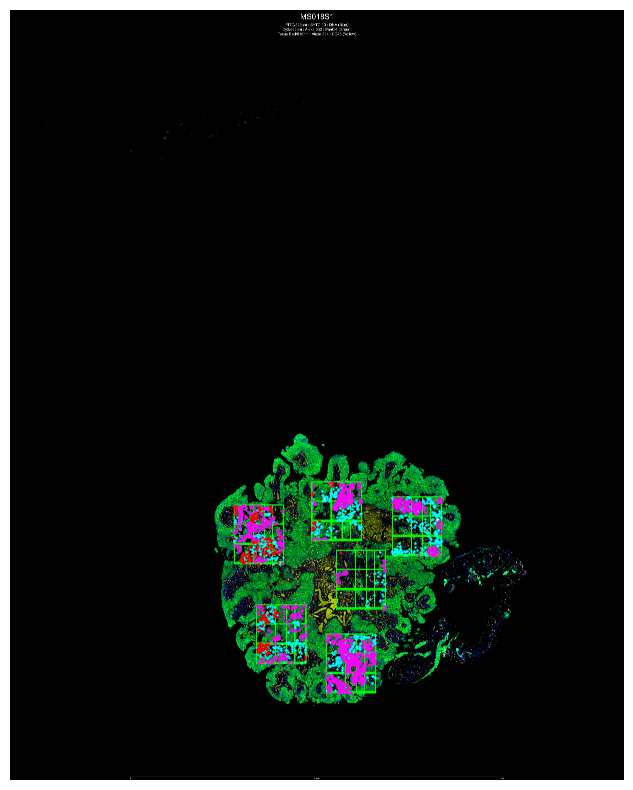

Total points in ROIs: 2698


In [71]:
import cv2
import matplotlib.pyplot as plt

def hex_to_bgr(hex_color):
    """Convert a hex color to a BGR tuple."""
    hex_color = hex_color.lstrip('#')
    hlen = len(hex_color)
    return tuple(int(hex_color[i:i+hlen//3], 16) for i in range(0, hlen, hlen//3))[::-1]

def is_point_in_roi(point, roi):
    x, y = point
    roi_x1, roi_y1, roi_x2, roi_y2 = roi
    return roi_x1 <= x <= roi_x2 and roi_y1 <= y <= roi_y2

image_path = "/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/SET2/MS018S1.png"
image = cv2.imread(image_path)
height, width, _ = image.shape

print("Image dimensions:", width, "x", height)

points_pixel = [(int(x * width), int(y * width)) for x, y in points_normalized]

print("Points_pixel:", len(points_pixel))

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Draw each ROI on the image
for roi in rois:
    x1, y1, x2, y2 = roi
    cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 40)

    # Print ROI coordinates for verification
    print("ROI:", roi)

# Set figure size
plt.figure(figsize=(10, 10))


total_points = 0
# Plot only the points that are inside any of the ROIs
for point, color in zip(points_pixel, points_colors):
    if any(is_point_in_roi(point, roi) for roi in rois):
        plt.scatter(point[0], point[1], c=color, marker='o', s=0.5)
        total_points += 1

# Set figure size

# Display the image
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

print("Total points in ROIs:", total_points)


# All Points :

Total points inside ROIs: 2698
Total points: 8108


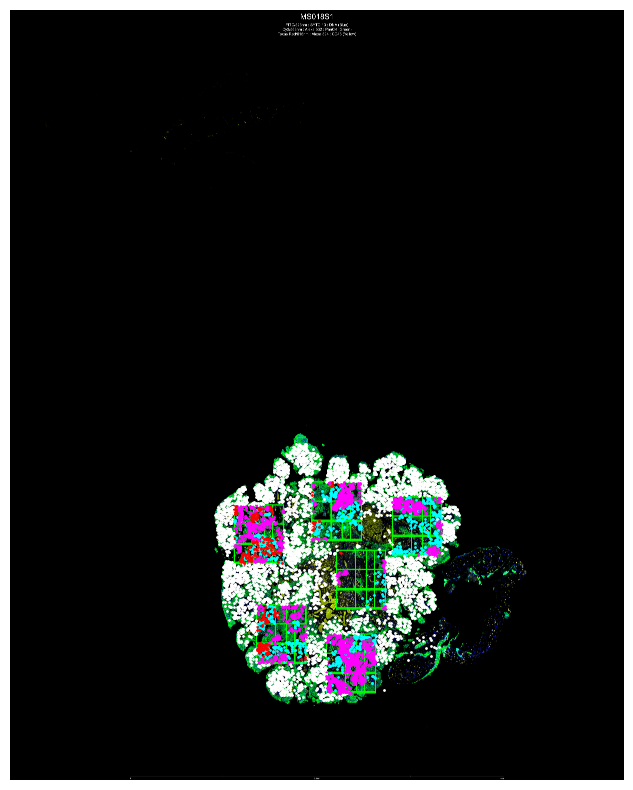

In [51]:
import cv2
import matplotlib.pyplot as plt

total_points = 0

# Draw each ROI on the image
for roi in rois:
    x1, y1, x2, y2 = roi
    cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 3)

# Set figure size
plt.figure(figsize=(10, 10))
    
# Plot and count the points that are inside any of the ROIs
for point, color in zip(points_pixel, points_colors):
    if any(is_point_in_roi(point, roi) for roi in rois):
        plt.scatter(point[0], point[1], c=color, marker='o', s=1)  # Points inside ROI
        total_points += 1
    else:
        plt.scatter(point[0], point[1], c='white', marker='o', s=1)  # Points outside ROI

print("Total points inside ROIs:", total_points)
print("Total points:", len(points_pixel))



# Display the image
plt.imshow(image_rgb)
plt.axis("off")
plt.show()


# Save Cooardinate of points Locally and globally

# Normalized

In [15]:
def get_label_from_color(color):
    """Return the label based on the color."""
    if color == '#00ffff' or color == '#0000ff':
        return '0'
    elif color == '#ff00ff':
        return '1'
    else:
        return '2'

# Dictionary to hold points for each ROI
roi_points = {roi_index: [] for roi_index, _ in enumerate(rois)}

# Assume points_colors is in the same order as points_pixel
for point, color in zip(points_pixel, points_colors):
    for roi_index, roi in enumerate(rois):
        if is_point_in_roi(point, roi):
            # Calculate local coordinates (relative to top-left of ROI)
            local_x = point[0] - roi[0]  # roi[0] is roi_x1
            local_y = point[1] - roi[1]  # roi[1] is roi_y1
            label = get_label_from_color(color)
            roi_points[roi_index].append((label, local_x, local_y))
            break

# Width and height are both 25
w, h = 50, 50

# Example image_number definition (you should replace this with your actual image number)
image_number = 18
normalized = 640
# Write points to separate TXT files
for roi_index, points in roi_points.items():
    # Assuming each ROI is associated with specific patch coordinates (patch_x, patch_y)
    # Replace with actual logic to obtain patch_x and patch_y for each ROI
    patch_x, patch_y = 0, 0  # Example values, replace with actual patch coordinates

    file_name = f"{image_number}_roi_{roi_index}.txt"
    file_path = f'/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/SET2/annotations/Annotations/{file_name}'
    
    with open(file_path, 'w') as file:
        for label, local_x, local_y in points:
            file.write(f'{label} {local_x / normalized} {local_y / normalized} {w / normalized} {h / normalized}\n')

    print(f'ROI {roi_index+1}: {len(points)} points written to {file_name}')



ROI 1: 102 points written to 18_roi_0.txt
ROI 2: 92 points written to 18_roi_1.txt
ROI 3: 111 points written to 18_roi_2.txt
ROI 4: 7 points written to 18_roi_3.txt
ROI 5: 116 points written to 18_roi_4.txt
ROI 6: 161 points written to 18_roi_5.txt
ROI 7: 75 points written to 18_roi_6.txt
ROI 8: 6 points written to 18_roi_7.txt
ROI 9: 60 points written to 18_roi_8.txt
ROI 10: 49 points written to 18_roi_9.txt
ROI 11: 11 points written to 18_roi_10.txt
ROI 12: 0 points written to 18_roi_11.txt
ROI 13: 92 points written to 18_roi_12.txt
ROI 14: 36 points written to 18_roi_13.txt
ROI 15: 117 points written to 18_roi_14.txt
ROI 16: 6 points written to 18_roi_15.txt
ROI 17: 42 points written to 18_roi_16.txt
ROI 18: 35 points written to 18_roi_17.txt
ROI 19: 89 points written to 18_roi_18.txt
ROI 20: 1 points written to 18_roi_19.txt
ROI 21: 29 points written to 18_roi_20.txt
ROI 22: 32 points written to 18_roi_21.txt
ROI 23: 51 points written to 18_roi_22.txt
ROI 24: 6 points written to 18